In [12]:
import torch
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import torch
import os
%matplotlib inline


In [13]:
# Loading trained model 

yolov7_path = '../'
model_path = '/home/jesus/Environment/malaria/yolov7/runs/train/x-500-batch-4/weights/best.pt'

model = torch.hub.load(yolov7_path,
                       'custom', 
                       path_or_model=model_path, 
                       force_reload=True, 
                       source='local')


                 from  n    params  module                                  arguments                     
  0                -1  1      1160  models.common.Conv                      [3, 40, 3, 1]                 
  1                -1  1     28960  models.common.Conv                      [40, 80, 3, 2]                
  2                -1  1     57760  models.common.Conv                      [80, 80, 3, 1]                
  3                -1  1    115520  models.common.Conv                      [80, 160, 3, 2]               
  4                -1  1     10368  models.common.Conv                      [160, 64, 1, 1]               
  5                -2  1     10368  models.common.Conv                      [160, 64, 1, 1]               
  6                -1  1     36992  models.common.Conv                      [64, 64, 3, 1]                
  7                -1  1     36992  models.common.Conv                      [64, 64, 3, 1]                
  8                -1  1     36992  

 76                28  1    102720  models.common.Conv                      [640, 160, 1, 1]              
 77          [-1, -2]  1         0  models.common.Concat                    [1]                           
 78                -1  1     41216  models.common.Conv                      [320, 128, 1, 1]              
 79                -2  1     41216  models.common.Conv                      [320, 128, 1, 1]              
 80                -1  1    147712  models.common.Conv                      [128, 128, 3, 1]              
 81                -1  1    147712  models.common.Conv                      [128, 128, 3, 1]              
 82                -1  1    147712  models.common.Conv                      [128, 128, 3, 1]              
 83                -1  1    147712  models.common.Conv                      [128, 128, 3, 1]              
 84                -1  1    147712  models.common.Conv                      [128, 128, 3, 1]              
 85                -1  1    147712  m

Adding autoShape... 


In [9]:
result = model(path)


#result.save('../samples/detected/' + file + '_final_2' + '.jpg')

Saved 20170830_140427.jpg to ../samples/detected/20170830_140427_final_2.jpg


In [14]:
# Feed the model with an image and return the inference's result
def getDetection (img_path):
    inference = model(img_path)
    
    inference = inference.pandas().xyxy[0].to_dict(orient='records')
    
    return inference

# Draw the ideal prediction of an image sample
def getIdealImage (path):
    y=1500
    x=800
    h=500
    w=500

    image = mpimg.imread(path,cv2.COLOR_BGR2RGB)

    crop = image[1500:2000, 800:1300]

    coordenadas = []
    count = 0
    for linha in open(labels,"r").readlines():
        if "Parasite" in linha:
            i = linha.find("Circle,2,")
            x = linha[i+len("Circle,2,"):]
            x = [int(float(y)) for y in x.split(",")]

            raio = int(((x[0]-x[2])**2 + (x[1] -x[3])**2)**0.5)
            x = [x[0],x[1],raio]
            coordenadas.append(x)
            count = count + 1
        
    color = (255, 0, 0)

    for circ in coordenadas:
        center = (circ[0],circ[1])
        p1 = (center[0] - circ[2], center [1] - circ[2])
        p2 = (center[0] + circ[2], center [1] + circ[2])
        image = cv2.rectangle(image, p1, p2, color, 4)
        #image = cv2.circle(image, center, circ[2], color, 2)

    plt.figure(figsize = (20,20))

    #crop = image[1500:2000, 800:1300]
    #plt.imshow(image)
    #plt.imsave('../samples/' + file + '_3' + '.jpg', crop)
    #plt.show()
    #print(count)
    
    return image

# Draw the predictions of an image
def drawPredictedBoudingBoxes (image, boxes):
    color = (0, 0, 255)
    
    for box in boxes:
        p1 = (int(box['xmin']), int(box['ymin']))
        p2 = (int(box['xmax']), int(box['ymax']))
        
        image = cv2.rectangle(image, p1, p2, color, 4)
    
    return image

In [15]:
# TF109_258/  20170830_162459
# TF105_245/  20170830_140427

# Setting examples of patient's image

direct = 'TF105_245/'
file = '20170830_140427'

path =   '../../../thick-blood-smears-150/' + direct + file +'.jpg' 
labels = '../../../thick-blood-smears-150/GT_updated/' + direct +file + '.txt'

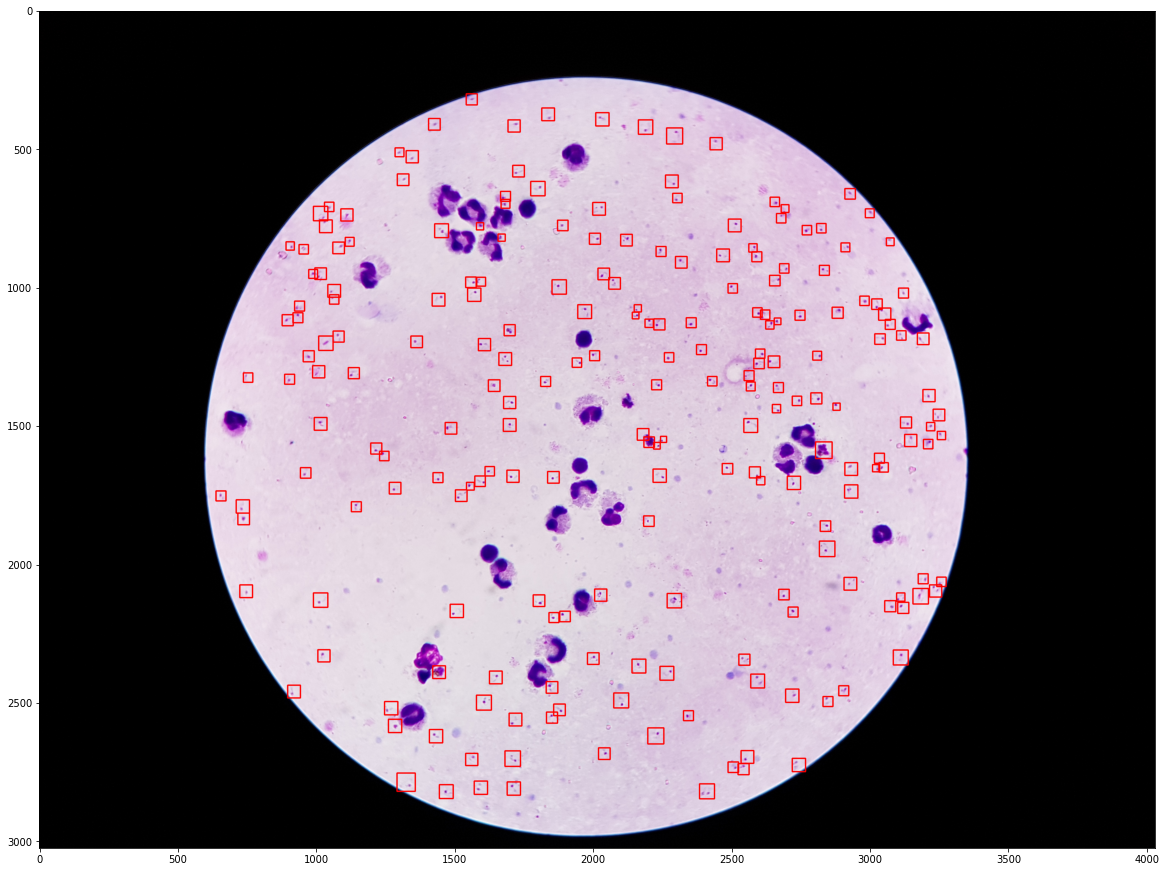

In [17]:
# Loading an image and drawing its ideals bouuding boxes

img = getIdealImage (path)

plt.imsave('../samples/detected/' + file + '_final_3' + '.jpg', img)

plt.imshow(img)
plt.show()

In [ ]:
# Detecting bounding boxes
boxes = getDetection(path)

# Drawing the predicted bounding boxes
img = mpimg.imread(path,cv2.COLOR_BGR2RGB)
final_image = drawPredictedBoudingBoxes (img, boxes)

# Saving the drawed image
plt.imsave('../samples/detected/' + file + '_final_4' + '.jpg', final_image)
    
# Showing the final result   
plt.figure(figsize = (20,20))
plt.imshow(final_image)
plt.show()

# Red: ideal bouding box
# Blue: predicted bouind box